In [68]:
 
import random
import numpy as np
import torch

#seed = 12314
#random.seed(seed)
#np.random.seed(seed)
#torch.manual_seed(seed)
#torch.cuda.manual_seed_all(seed)

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[3.80559983e-01 7.57939924e-02 5.60043199e-01 ... 3.18344497e-02
  4.96586341e-01 4.98763179e-01]
 [4.52273962e-01 9.00768624e-02 6.65579586e-01 ... 3.78334384e-02
  5.90164710e-01 5.92751758e-01]
 [3.94665722e-01 7.86033532e-02 5.80801617e-01 ... 3.30144173e-02
  5.14992684e-01 5.17250208e-01]
 ...
 [2.03275318e-02 4.04852022e-03 2.99145901e-02 ... 1.70043046e-03
  2.65250554e-02 2.66413307e-02]
 [2.17240602e-01 4.32665895e-02 3.19697623e-01 ... 1.81725229e-02
  2.83473620e-01 2.84716256e-01]
 [3.93348853e-03 7.83410798e-04 5.78863674e-03 ... 3.29042591e-04
  5.13274324e-03 5.15524315e-03]]

Noisy Matrix (with Homoscedastic Noise):
[[ 4.60649045e-01  1.33741412e-01  5.30377221e-01 ...  1.12274040e-01
   6.75635161e-01  5.94427652e-01]
 [ 5.09875639e-01  2.02583102e-01  6.38094172e-01 ...  1.60746415e-01
   4.72862640e-01  7.08198024e-01]
 [ 4.88510230e-01  2.41605814e-01  5.84986534e-01 ... -6.28070159e-02
   6.25567561e-01  5.76589298e-01]
 ...
 [-9.15

In [69]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [70]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [71]:
type(mycebmf)

cEBMF.cEBMF_object

In [72]:
K = np.min([K, U.shape[1]])
print(K)

5


In [73]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


[ 0.12358658  0.391729    0.0212726  -0.2427481  -0.1502762   0.31501144
  0.20642178 -0.18810591 -0.03684755  0.04161878 -0.1688912  -0.13733356
 -0.05459691 -0.22384161 -0.16762084  0.08894045 -0.25407192  0.08127485
 -0.12022901 -0.17602226 -0.00570755 -0.2611098  -0.03500856  0.09665553
  0.12205923 -0.0551729   0.06744124  0.16130479 -0.11215792  0.24626532
  0.36311767  0.12550934  0.12866177 -0.04091876  0.11078265  0.05216733
 -0.05015494  0.13064304  0.18262336 -0.12497101 -0.02214828 -0.04653616
 -0.03162081 -0.01824032 -0.48407644 -0.12225204  0.02846261 -0.08593286
 -0.07563626 -0.31633124]
[ 0.2469659   0.22927974  0.09309359 -0.16475412 -0.14574333 -0.03370203
 -0.12342563  0.1322234   0.18494447 -0.16747805 -0.07002732  0.15862243
  0.22766823 -0.1465055  -0.20051901  0.15260899  0.05617985  0.04301965
 -0.25222468 -0.05518048 -0.17503029  0.07274573  0.27471593 -0.23105079
 -0.14705172 -0.02737689 -0.14830914 -0.02524837  0.16324814 -0.09031
  0.11584049 -0.02731772 -0.

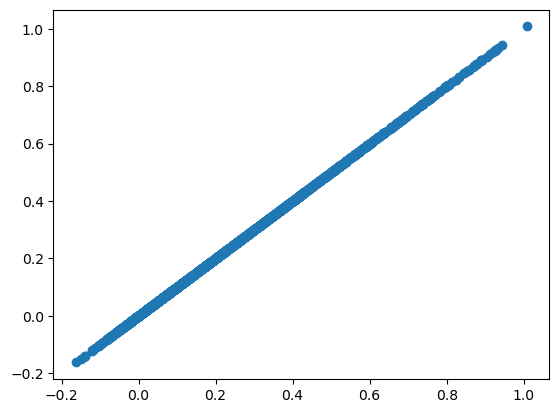

In [74]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

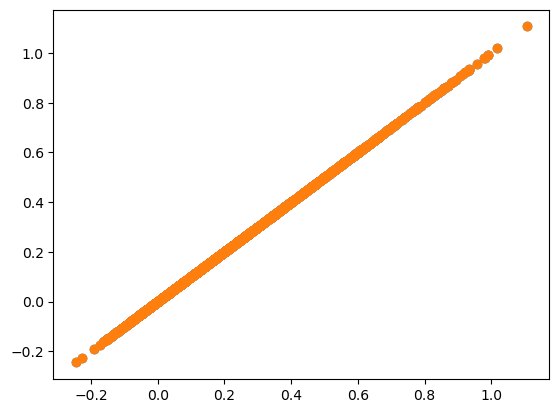

In [75]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [76]:
mycebmf.update_tau()
mycebmf.tau

array([[152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059],
       [152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059],
       [152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059],
       ...,
       [152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059],
       [152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059],
       [152.65059, 152.65059, 152.65059, ..., 152.65059, 152.65059,
        152.65059]], dtype=float32)

In [77]:
mycebmf.prior_F

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [78]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

<function prior_norm at 0x000002EDA76BF5B0>


In [79]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([ 0.8338379 ,  0.2207786 ,  1.3165152 ,  0.34816596,  0.75127566,
         1.4717754 ,  0.27251652,  0.1401916 ,  0.44189638,  0.6868798 ,
         0.83186775,  1.5833545 ,  0.6443373 ,  1.3026019 ,  0.66086525,
         1.35596   ,  0.7329195 ,  0.66321415,  0.22435403,  1.0382649 ,
         1.4531132 ,  0.96371156,  1.1306494 ,  0.7766457 ,  0.63353884,
         0.9478042 ,  0.33397377,  1.1271255 ,  0.02572868,  0.9642921 ,
         0.9441982 ,  0.21767673,  0.91208315, -0.03946507,  0.91832304,
        -0.01400597,  0.24716991,  0.08801335,  1.1068757 ,  1.1285524 ],
       dtype=float32),
 array([0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393,
        0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393,
        0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393,
        0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393,
        0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393, 0.0310393,
        0.0310393, 0.0

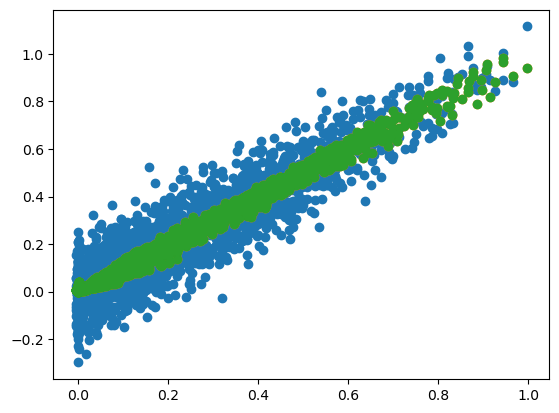

In [80]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


In [81]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
          

0.0007711909183983876

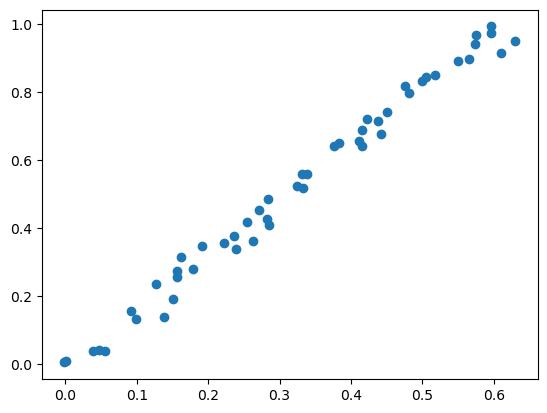

In [82]:
plt.scatter(mycebmf.L[:,0], u)

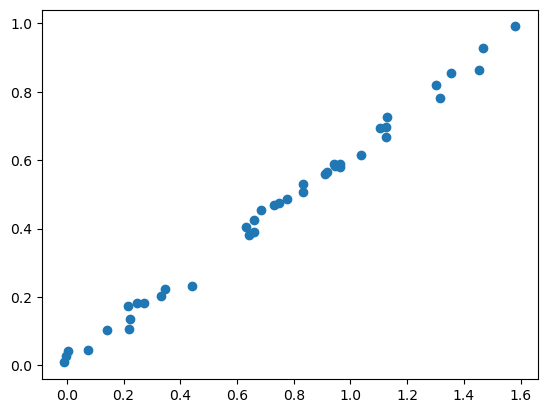

In [83]:
plt.scatter(mycebmf.F[:,0], v)

In [84]:
mycebmf.L[:,1]

array([ 1.1510556e-09,  3.9142369e-09,  1.9715224e-10, -2.3035034e-09,
       -1.4032346e-09,  3.0497438e-09,  1.9448452e-09, -1.7661975e-09,
       -3.4103972e-10,  3.8575440e-10, -1.5813250e-09, -1.2805481e-09,
       -5.0577037e-10, -2.1154527e-09, -1.5692105e-09,  8.2598778e-10,
       -2.4173332e-09,  7.5429812e-10, -1.1191102e-09, -1.6498575e-09,
       -5.2552164e-11, -2.4885534e-09, -3.2403821e-10,  8.9799757e-10,
        1.1365155e-09, -5.1097021e-10,  6.2558281e-10,  1.5089043e-09,
       -1.0429920e-09,  2.3390250e-09,  3.5799033e-09,  1.1691745e-09,
        1.1989720e-09, -3.7892836e-10,  1.0304438e-09,  4.8362098e-10,
       -4.6448240e-10,  1.2174859e-09,  1.7136867e-09, -1.1637705e-09,
       -2.0481987e-10, -4.3078435e-10, -2.9265448e-10, -1.6860863e-10,
       -5.1617821e-09, -1.1381442e-09,  2.6369837e-10, -7.9757806e-10,
       -7.0140632e-10, -3.0634502e-09], dtype=float32)

In [85]:
for i in range(40):
    mycebmf.iter()

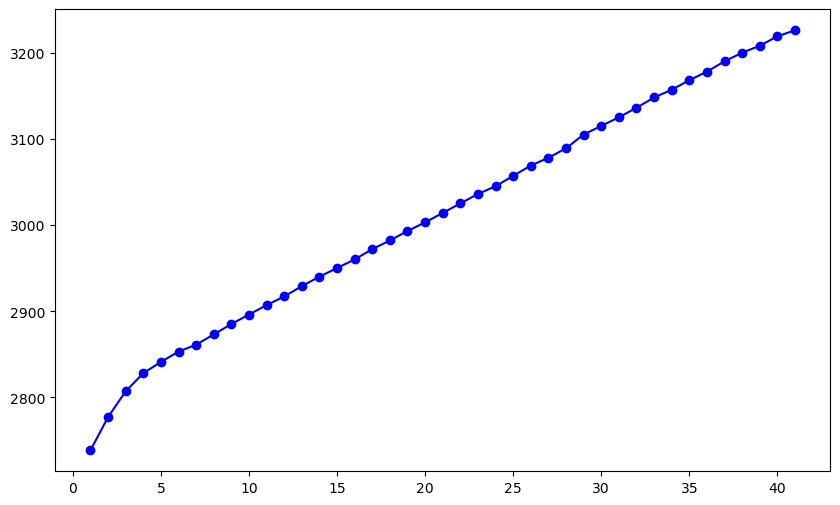

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

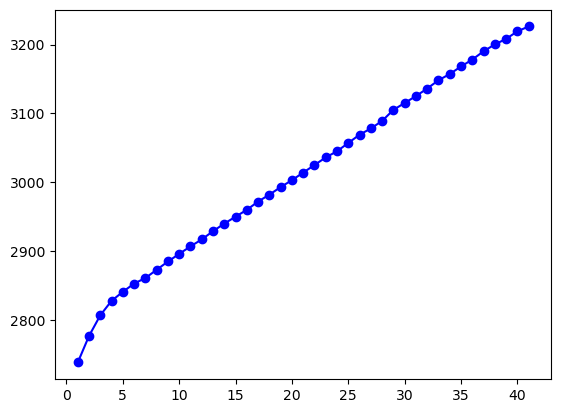

In [87]:
plt.plot(np.array(mycebmf.obj) , marker='o', linestyle='-', color='b')

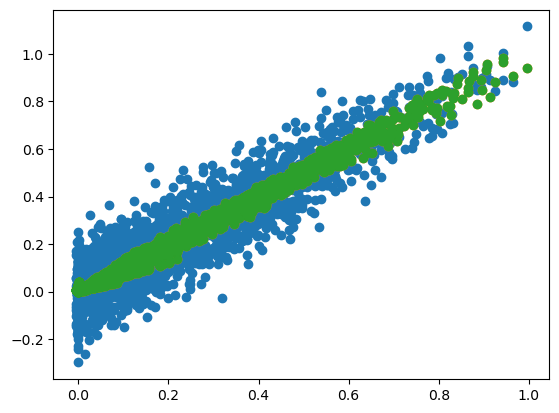

In [88]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [89]:
np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
 

0.0013376128505687163

In [90]:

results = []

for i in range(200):
    # Parameters
    n, p = 50, 40  # Dimensions of the matrix
    noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
    u = np.random.rand(n)  # Vector of length n
    v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
    rank_1_matrix = np.outer(u, v)
 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    noise = np.random.normal(0, noise_std, size=(n, p))
    noisy_matrix = rank_1_matrix + noise
    mycebmf= cEBMF(data= noisy_matrix)
    mycebmf.init_LF()
    for j in range(40):
        mycebmf.iter()

        rr = np.sqrt(np.mean(mycebmf.Y_fit- rank_1_matrix)**2)
            
        results.append( rr)
 

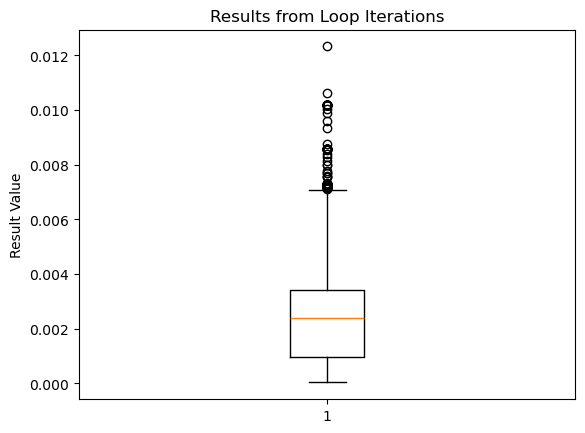

In [94]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [95]:
res= np.asarray(results)

In [96]:
np.mean(res )

0.002503755784777149